In [87]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Datasets\BPI_Challenge_2012_csvfile.csv'
data = pd.read_csv(file_path)

filtered_data = data[['case:concept:name', 'concept:name', 'time:timestamp']]


In [75]:
filtered_data.head(5)

,case:concept:name,concept:name,time:timestamp
0,173688,A_SUBMITTED,2011-09-30 22:38:44.546000+00:00
1,173688,A_PARTLYSUBMITTED,2011-09-30 22:38:44.880000+00:00
2,173688,A_PREACCEPTED,2011-09-30 22:39:37.906000+00:00
3,173688,W_Completeren aanvraag,2011-09-30 22:39:38.875000+00:00
4,173688,W_Completeren aanvraag,2011-10-01 09:36:46.437000+00:00


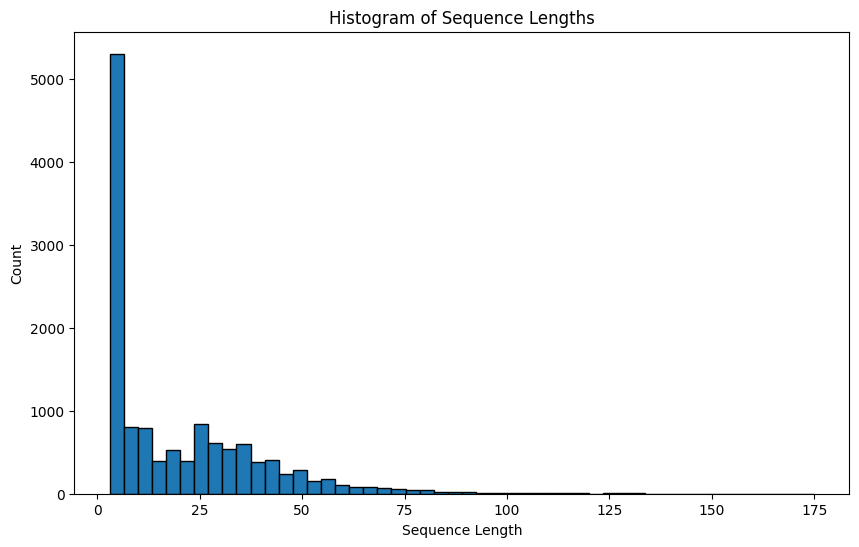

       case:concept:name  Sequence Length
0                 173688               26
1                 173691               39
2                 173694               59
3                 173697                3
4                 173700                3
...                  ...              ...
13082             214364               29
13083             214367                3
13084             214370                6
13085             214373               17
13086             214376                6

[13087 rows x 2 columns]


In [76]:


sequence_lengths = filtered_data.groupby('case:concept:name').size()
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=50, edgecolor='black')
plt.title('Histogram of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.show()

sequence_lengths = data.groupby('case:concept:name').size().reset_index(name='Sequence Length')
print(sequence_lengths)

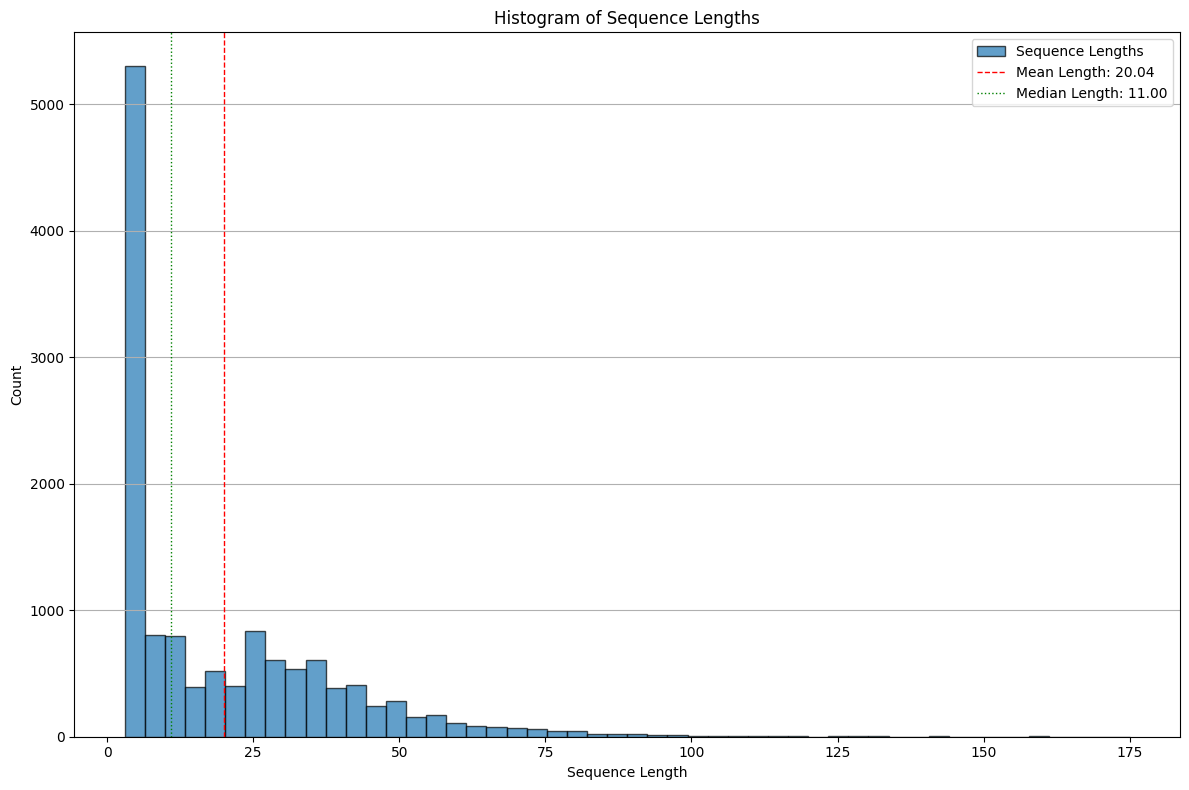

In [77]:

import numpy as np
import matplotlib.pyplot as plt

sequence_lengths = data.groupby('case:concept:name').size()
mean_length = np.mean(sequence_lengths)
median_length = np.median(sequence_lengths)

plt.figure(figsize=(12, 8))
plt.hist(sequence_lengths, bins=50, edgecolor='black', alpha=0.7, label="Sequence Lengths")
plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=1, label=f"Mean Length: {mean_length:.2f}")
plt.axvline(median_length, color='g', linestyle='dotted', linewidth=1, label=f"Median Length: {median_length:.2f}")
plt.title('Histogram of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()



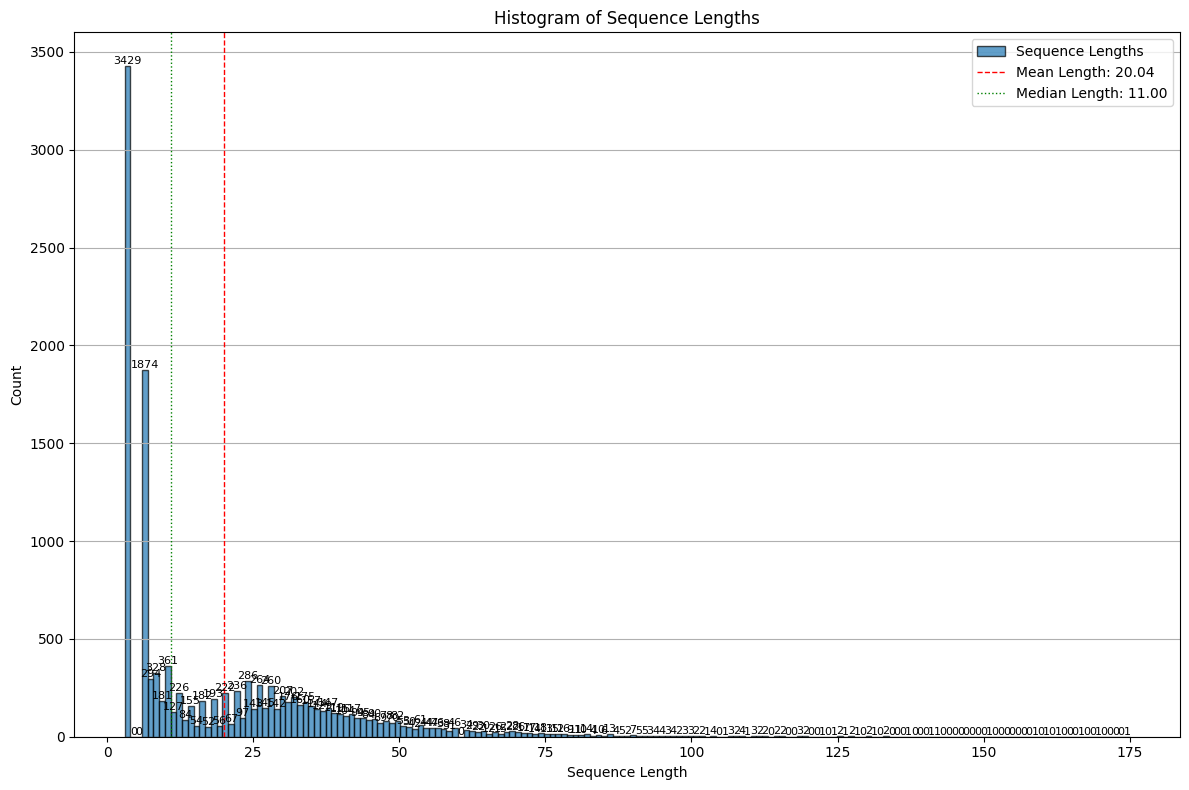

In [88]:
import numpy as np
import matplotlib.pyplot as plt

sequence_lengths = data.groupby('case:concept:name').size()
mean_length = np.mean(sequence_lengths)
median_length = np.median(sequence_lengths)

plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(sequence_lengths, bins=175, edgecolor='black', alpha=0.7, label="Sequence Lengths")

# Annotating the count above each bar
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2., patches[i].get_height(),
             f'{int(patches[i].get_height())}', ha='center', va='bottom', fontsize=8)

plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=1, label=f"Mean Length: {mean_length:.2f}")
plt.axvline(median_length, color='g', linestyle='dotted', linewidth=1, label=f"Median Length: {median_length:.2f}")
plt.title('Histogram of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


In [56]:
# Filtering sequences greater than 75
sequences_above_75 = sequence_lengths[sequence_lengths <= 75]

# Converting to DataFrame for easy manipulation and saving
df_above_75 = sequences_above_75.reset_index(name='Sequence Length')
# Sort by descending sequence length
df_above_75 = df_above_75.sort_values(by='Sequence Length', ascending=False)

# Print the sorted DataFrame
print(df_above_75)

       case:concept:name  Sequence Length
10854             208196               75
3672              185348               75
8539              200814               75
9295              203227               75
4501              187930               75
...                  ...              ...
4869              189133                3
4867              189127                3
4866              189124                3
4850              189076                3
6427              194064                3

[12854 rows x 2 columns]


In [79]:
sequence_lengths = data.groupby('case:concept:name').size()
distribution = sequence_lengths.value_counts().reset_index()
distribution.columns = ['Sequence Length', 'Count']
distribution = distribution.sort_values(by='Sequence Length')
#print(distribution.to_string(index=False))
display(distribution)


,Sequence Length,Count
0,3,3429
1,6,1874
4,7,294
3,8,328
15,9,181
...,...,...
120,161,1
115,163,1
128,167,1
116,170,1


In [80]:
import pandas as pd
import json

# Assuming 'data' is already loaded
data_sorted = data[data['case:concept:name'] == 173688].sort_values(by=['time:timestamp'])

# Create sequences for each case ID (in this instance, only one case ID is being considered)
sequences = data_sorted.groupby('case:concept:name')['concept:name'].apply(list).reset_index(name='Event Sequence')

# Save the sequence to a JSON file
output_json_path = 'sequence_173688.json'
sequence_for_case = sequences['Event Sequence'][0]
with open(output_json_path, 'w') as json_file:
    json.dump(sequence_for_case, json_file)

print(sequences)

   case:concept:name                                     Event Sequence
0             173688  [A_SUBMITTED, A_PARTLYSUBMITTED, A_PREACCEPTED...


In [60]:
import pandas as pd

# Assuming 'data' is already loaded
data_sorted = data.sort_values(by=['case:concept:name', 'time:timestamp'])

# Group by case ID and create sequences
sequences_df = data_sorted.groupby('case:concept:name')['concept:name'].apply(list).reset_index(name='Event Sequence')

# Filter sequences with less than 2 events
short_sequences_df = sequences_df[sequences_df['Event Sequence'].str.len() < 7]

# Convert to a list of dictionaries for easier viewing
short_sequences_list = short_sequences_df.to_dict('records')
print(short_sequences_df)
print(short_sequences_list)


       case:concept:name                                     Event Sequence
3                 173697       [A_SUBMITTED, A_PARTLYSUBMITTED, A_DECLINED]
4                 173700       [A_SUBMITTED, A_PARTLYSUBMITTED, A_DECLINED]
13                173727       [A_SUBMITTED, A_PARTLYSUBMITTED, A_DECLINED]
15                173733  [A_SUBMITTED, A_PARTLYSUBMITTED, W_Afhandelen ...
23                173757       [A_SUBMITTED, A_PARTLYSUBMITTED, A_DECLINED]
...                  ...                                                ...
13075             214343  [A_SUBMITTED, A_PARTLYSUBMITTED, W_Afhandelen ...
13077             214349  [A_SUBMITTED, A_PARTLYSUBMITTED, W_Afhandelen ...
13083             214367       [A_SUBMITTED, A_PARTLYSUBMITTED, A_DECLINED]
13084             214370  [A_SUBMITTED, A_PARTLYSUBMITTED, W_Afhandelen ...
13086             214376  [A_SUBMITTED, A_PARTLYSUBMITTED, W_Afhandelen ...

[5303 rows x 2 columns]
[{'case:concept:name': 173697, 'Event Sequence': ['A_SUBMITTED'

In [25]:
# Convert the 'Event Sequence' column to string to enable groupby
df=short_sequences_df
df['Event Sequence'] = df['Event Sequence'].astype(str)

# Group by 'Event Sequence' and count
sequence_counts = df.groupby('Event Sequence').size().reset_index(name='Count')

print(sequence_counts)


                                      Event Sequence  Count
0  ['A_SUBMITTED', 'A_PARTLYSUBMITTED', 'A_DECLIN...   3429
1  ['A_SUBMITTED', 'A_PARTLYSUBMITTED', 'A_PREACC...      1
2  ['A_SUBMITTED', 'A_PARTLYSUBMITTED', 'A_PREACC...      1
3  ['A_SUBMITTED', 'A_PARTLYSUBMITTED', 'W_Afhand...   1872


C:\Users\Anjali\AppData\Local\Temp\ipykernel_8600\3639067335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event Sequence'] = df['Event Sequence'].astype(str)


In [67]:
import pandas as pd

# Load your dataset
data_encoded = filtered_data


data_encoded.rename(columns={'case:concept:name': 'caseid', 'concept:name': 'activityname','time:timestamp':'timestamp'}, inplace=True)
data_encoded.head(5)


C:\Users\Anjali\AppData\Local\Temp\ipykernel_8600\2104664031.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_encoded.rename(columns={'case:concept:name': 'caseid', 'concept:name': 'activityname','time:timestamp':'timestamp'}, inplace=True)


,caseid,activityname,timestamp
0,173688,A_SUBMITTED,2011-09-30 22:38:44.546000+00:00
1,173688,A_PARTLYSUBMITTED,2011-09-30 22:38:44.880000+00:00
2,173688,A_PREACCEPTED,2011-09-30 22:39:37.906000+00:00
3,173688,W_Completeren aanvraag,2011-09-30 22:39:38.875000+00:00
4,173688,W_Completeren aanvraag,2011-10-01 09:36:46.437000+00:00


In [81]:

concept_to_int = {concept: idx+1 for idx, concept in enumerate(sorted(data_encoded['activityname'].unique()))}
data_encoded['concept_encoded'] = data_encoded['activityname'].map(concept_to_int)

In [82]:
data_encoded.head(5)

,caseid,activityname,timestamp,concept_encoded
0,173688,A_SUBMITTED,2011-09-30 22:38:44.546000+00:00,10
1,173688,A_PARTLYSUBMITTED,2011-09-30 22:38:44.880000+00:00,7
2,173688,A_PREACCEPTED,2011-09-30 22:39:37.906000+00:00,8
3,173688,W_Completeren aanvraag,2011-09-30 22:39:38.875000+00:00,20
4,173688,W_Completeren aanvraag,2011-10-01 09:36:46.437000+00:00,20


In [86]:
for activity, code in concept_to_int.items():
    print(f"Activity Name: {activity}, Code: {code}")

Activity Name: A_ACCEPTED, Code: 1
Activity Name: A_ACTIVATED, Code: 2
Activity Name: A_APPROVED, Code: 3
Activity Name: A_CANCELLED, Code: 4
Activity Name: A_DECLINED, Code: 5
Activity Name: A_FINALIZED, Code: 6
Activity Name: A_PARTLYSUBMITTED, Code: 7
Activity Name: A_PREACCEPTED, Code: 8
Activity Name: A_REGISTERED, Code: 9
Activity Name: A_SUBMITTED, Code: 10
Activity Name: O_ACCEPTED, Code: 11
Activity Name: O_CANCELLED, Code: 12
Activity Name: O_CREATED, Code: 13
Activity Name: O_DECLINED, Code: 14
Activity Name: O_SELECTED, Code: 15
Activity Name: O_SENT, Code: 16
Activity Name: O_SENT_BACK, Code: 17
Activity Name: W_Afhandelen leads, Code: 18
Activity Name: W_Beoordelen fraude, Code: 19
Activity Name: W_Completeren aanvraag, Code: 20
Activity Name: W_Nabellen incomplete dossiers, Code: 21
Activity Name: W_Nabellen offertes, Code: 22
Activity Name: W_Valideren aanvraag, Code: 23
Activity Name: W_Wijzigen contractgegevens, Code: 24


In [83]:
df_sequences = data_encoded.groupby('caseid')['concept_encoded'].apply(list).reset_index(name='sequence')

In [84]:
df_sequences.head(5)
df_sequences.to_csv('encoded_sequences.csv', index=False)


In [85]:
df_sequences.head(5)

,caseid,sequence
0,173688,"[10, 7, 8, 20, 20, 1, 15, 6, 13, 16, 22, 20, 2..."
1,173691,"[10, 7, 8, 20, 20, 20, 20, 1, 6, 15, 13, 16, 2..."
2,173694,"[10, 7, 8, 20, 20, 20, 20, 20, 20, 20, 20, 1, ..."
3,173697,"[10, 7, 5]"
4,173700,"[10, 7, 5]"
